# - GHI shifting error correction

### Load GHI data extracted from the fittings to adjust a model that compensate systematic errors on the Girasol Machine. It does it only for shifting and attenuation error found with respect to the theoretical GHI calculate at the corresponding localization.

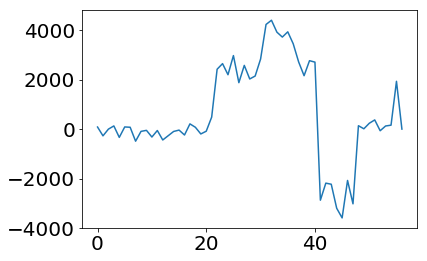

[[datetime.datetime(2017, 12, 8, 8, 8, 11, 5904)]
 [datetime.datetime(2017, 12, 9, 8, 8, 55, 212962)]
 [datetime.datetime(2017, 12, 12, 8, 11, 0, 5739)]
 [datetime.datetime(2017, 12, 13, 8, 11, 39, 4463)]
 [datetime.datetime(2017, 12, 15, 8, 12, 54, 7426)]
 [datetime.datetime(2017, 12, 19, 8, 15, 9, 7693)]
 [datetime.datetime(2017, 12, 20, 8, 15, 39, 8331)]
 [datetime.datetime(2018, 1, 1, 8, 19, 46, 5015)]
 [datetime.datetime(2018, 1, 11, 8, 20, 10, 4544)]
 [datetime.datetime(2018, 1, 12, 8, 20, 3, 5042)]
 [datetime.datetime(2018, 1, 13, 8, 19, 54, 5823)]
 [datetime.datetime(2018, 1, 22, 8, 17, 16, 10969)]
 [datetime.datetime(2018, 1, 24, 8, 16, 22, 5041)]
 [datetime.datetime(2018, 1, 27, 8, 14, 49, 5232)]
 [datetime.datetime(2018, 2, 2, 8, 10, 58, 6303)]
 [datetime.datetime(2018, 2, 7, 8, 7, 3, 1555)]
 [datetime.datetime(2018, 2, 11, 8, 3, 28, 1646)]
 [datetime.datetime(2018, 2, 26, 7, 47, 5, 1206)]
 [datetime.datetime(2018, 3, 1, 7, 43, 20, 1891)]
 [datetime.datetime(2018, 3, 2, 7, 4

In [5]:
import datetime, time, pickle  
import numpy as np
import matplotlib.pyplot as plt

def load_data(path, name):
    file = path.format(name)
    
    with open(file, 'rb') as f:
        X = pickle.Unpickler(f).load()
        Y = pickle.Unpickler(f).load()           
    return X, Y

Z, W = load_data(path = 'Q:{}', name = 'clear_sky_ghi.pkl')
Z = Z[:, np.newaxis] 
W = W[:, np.newaxis]

plt.figure()
plt.plot(W)
plt.show()

print(Z)

N = Z.shape[0]
O = np.linspace(1, N, N)[:, np.newaxis]
print(Z.shape, W.shape, O.shape)

for i in range(0, len(Z)):
    Z[i][0] = Z[i][0].timetuple().tm_yday

In [6]:
i = np.where(Z == 1)[0][0]
z_1_ = Z[:i]
z_2_ = Z[i:]
print(z_1_.T)
print(z_2_.T)
x_1_ = np.linspace(z_1_.min(), 365, 365 - z_1_.min() + 1)
x_2_ = np.linspace(z_2_.min(), z_2_.max(), 365)
print(x_1_.T)
print(x_2_.T)
x_ = np.concatenate((x_1_, x_2_), axis = 0)
print(x_.shape)

i = np.where(x_ == 1)[0][0]
x_[:i] -= 365
print(x_)

i = np.where(Z == 1)[0][0]
Z[:i] -= 365

[[342 343 346 347 349 353 354]]
[[1 11 12 13 22 24 27 33 38 42 57 60 61 62 63 94 99 104 108 113 136 139
  143 144 158 159 162 163 173 175 176 182 199 202 221 255 256 258 261 265
  266 306 309 310 311 312 328 331 343 365]]
[342. 343. 344. 345. 346. 347. 348. 349. 350. 351. 352. 353. 354. 355.
 356. 357. 358. 359. 360. 361. 362. 363. 364. 365.]
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 

### Program to fit a stepwise model to loaded data to compensate shifting errors on GHI measurements.

-83.18181818181819 2929.5789473684213 -2737.285714285714 0.5360623781676414


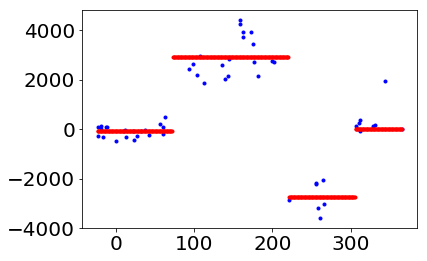

[221] [221]
[[-23 -22 -19 -18 -16 -12 -11 1 11 12 13 22 24 27 33 38 42 57 60 61 62 63
  94 99 104 108 113 136 139 143 144 158 159 162 163 173 175 176 182 199
  202 221 255 256 258 261 265 266 306 309 310 311 312 328 331 343 365]]


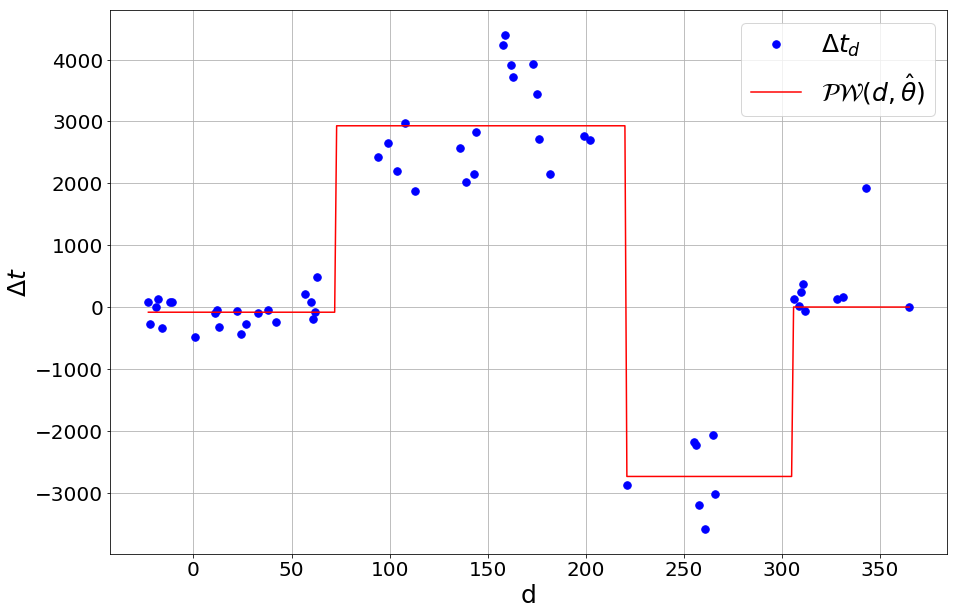

In [7]:
d1 = 72
d2 = 220
d3 = 305
d4 = 340

m1 = np.mean(W[Z < d1])
m2 = np.mean(W[(Z > d1) & (Z < d2)])
m3 = np.mean(W[(Z > d2) & (Z < d3)])
m4 = np.mean(W[Z > d3] & (Z < d4))
print(m1, m2, m3, m4)

Y = x_.copy()


Y[x_ <= d1] = m1
Y[x_ > d1]  = m2
Y[x_ > d2]  = m3
Y[x_ > d3]  = m4
Y[x_ > d4]  = 0

plt.figure()
plt.plot(Z, W, 'b.')
plt.plot(x_, Y, 'r.')
plt.show()
print(Z[41], Z[41])

#e = np.mean(np.sqrt( ( np.squeeze(W) - np.squeeze(Y) )**2 ))
#print(e)

print(Z.T)

plt.rcParams.update({'font.size': 20})

plt.figure(figsize = (15,10))
plt.plot(Z, W, 'b.', markersize = 15, label = r'$\Delta t_{d}$')
plt.plot(x_, Y, 'r-', label = r'$\mathcal{PW} ( d, \hat{\theta})$')
plt.xlabel(r'd', fontsize = 25)
plt.ylabel(r'$\Delta t$', fontsize = 25)
plt.legend(prop={'size': 25})
plt.grid()
plt.show()

### Test Model for a future time instant during the implementation - THIS MODEL IS WRONG!

[4.208333333333333, 2929.5789473684213, -2737.285714285714, 139.42857142857142, 72, 220, 305]
2019-03-28 10:11:19
87 2019
139.42857142857142


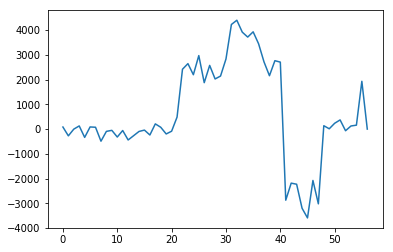

In [18]:
import datetime, time, pickle  
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
    
    
def picewise_model(C, x0, x1):
        
    if x0 <= C[4]:
        y1 = C[0]
    
    if x0 >  C[4]:
        y1 = C[1]
            
    if x0 >  C[5]:
        y1 = C[2]
            
    if x0 >  C[6] or x1 > 2018:
        y1 = C[3]
                       
    return y1


C    = [m1, m2, m3, m4, d1, d2, d3]
print(C)

unix = float(1553789479)
tm   = datetime.fromtimestamp(unix)
print(tm)

x0 = tm.timetuple().tm_yday
x1 = tm.timetuple().tm_year
print(x0, x1)

y1 = picewise_model(C, x0, x1)
print(y1)

plt.figure()
plt.plot(W)
plt.show()

### Program that does polynomial fitting with the degrees of freedom validated using the loaded data

(513, 1) (513, 1)
[[-365]]


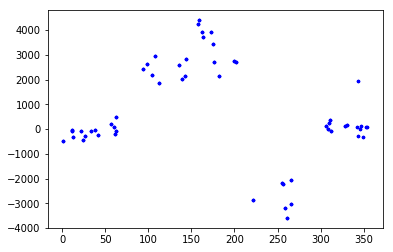

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


def polynomial_least_squares_fit(X, Y, n):
    X = PolynomialFeatures(n).fit_transform(X)
    return np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))


def polynomial_least_squares_model(X, C, n):
    X = PolynomialFeatures(n).fit_transform(X)
    return np.matmul(X, C)

n = 365
i = np.argsort(np.squeeze(Z))
Z = Z[i, :]
W = W[i, :]
W = np.concatenate((W, W, W))
Z = np.concatenate((Z - n, Z, Z + n))
print(Z.shape, W.shape)


idx = np.squeeze((Z < 365) & (Z > 0.))
x   = np.arange(-365, 2*365, 3*365 + 1)[:, np.newaxis]
print(x)
#for n in range(20):
#    C     = polynomial_least_squares_fit(Z, W, n)
#    Y_hat = polynomial_least_squares_model(x, C, n)
#    print( Y_hat[np.squeeze(x) == np.squeeze(Z[idx])] ) 
#    e = np.mean(np.sqrt( ( np.squeeze(Y_hat[Z[idx]]) - np.squeeze(W[idx]) )**2 ))
#    print(n, e)
    
#C0    = polynomial_least_squares_fit(Z, W, n = 0)
#Y_hat = polynomial_least_squares_model(x, C0, n = 0) 
#print(Z[idx].shape, W[idx].shape)
plt.figure()
plt.plot(Z[idx], W[idx], 'b.', markersize = 5)
#plt.plot(x[np.squeeze((x < 365) & (x > 0.))], Y_hat[np.squeeze((x < 365) & (x > 0.))  ], 'r-')
plt.show()

#print(C0.shape, x.shape, Y_hat.shape, np.squeeze(W[idx]).shape, np.squeeze(Y_hat[Z[idx]]).shape, Z.shape)

# - GHI attenuaton error correction

### These programs load the data and prepared it for an smooth fitting in which the end of a year overlaps with the beggining of another year.

In [9]:
import datetime, time, pickle  
import numpy as np
import matplotlib.pyplot as plt

def load_data(path, name):
    file = path.format(name)
    
    with open(file, 'rb') as f:
        X = pickle.Unpickler(f).load()
        Y = pickle.Unpickler(f).load()
        Z = pickle.Unpickler(f).load()
        W = pickle.Unpickler(f).load()            
    return X, Y, Z, W

X, Y, Z, W = load_data(path = 'Q:{}', name = 'clear_sky_solar_normal_radiation_fit.pkl')

Z = Z[:, np.newaxis] 
W = W[:, np.newaxis]
print(X.shape, Y.shape, Z.shape, W.shape)

(53, 1) (53, 3) (53, 1) (53, 1)


In [10]:
n  = 365
i  = np.argsort(np.squeeze(Z))
ii = Z[i, :]
X  = X[i, :]
Y  = Y[i, :]
Z  = Z[i, :]
W  = W[i, :]

X  = np.concatenate((X, X, X))
Y  = np.concatenate((Y, Y, Y))
W  = np.concatenate((W, W, W))
Z  = np.concatenate((Z - n, Z, Z + n))
print(X.shape, Y.shape, Z.shape, W.shape)

(159, 1) (159, 3) (159, 1) (159, 1)


### Program to optimiza the paramters of a attenuation model that uses a sin function instead of a polynomial

In [11]:
import numpy as np
import pickle, datetime
import matplotlib.pyplot as plt
from scipy.optimize import fmin_l_bfgs_b

def _f(a, b, c, Y, N = 365.):
    return a * np.sin(b + ( (2*np.pi)/N) * Y) + c


def _G(*var):
    
    a = var[0][0]
    b = var[0][1]
    c = var[0][2]
    X = var[1]
    Y = var[2]
    
    N = 365.
    n = X.shape[0]

    F  = _f(a, b, c, Y)
    c  = - (1./n) * ( (X - F) / abs(X - F) )
    
    g1 = c * np.sin(b + ( (2*np.pi)/N ) * Y)
    g2 = c * a * np.sin(b + ( (2*np.pi)/N ) * Y)
    g3 = c * 1.
    G = np.array((g1.sum(), g2.sum(), g3.sum()))

    return G

def _E(*var):
    
    a = var[0][0]
    b = var[0][1]
    c = var[0][2]
    X = var[1]
    Y = var[2]
    
    F = _f(a, b, c, Y)
    e = np.sqrt(np.mean((X - F)**2))

    return e


# Implementation of the line search gradient based optimization method
def _L_BFGS(F, G, X_train, Y_train, x0, b, n_restarts_optimizer = 5):
    
    # Random initialization of the line search for each kernel hyper-parameter within the bounds.
    def __random_initialization(b):
        d   = len(b)
        x_k = np.zeros(d)

        for i in range(d):
            x_k[i] = np.random.uniform(b[i][0], b[i][1])

        return x_k

    f_eval = []
    x_eval = []
    i = 1
    while i < n_restarts_optimizer:  
    
        x0 = __random_initialization(b)

        # Run the line search BFGS optimization!
        OPT = fmin_l_bfgs_b(F, x0 = x0, fprime = G, args = (X_train, Y_train), bounds = b, maxfun = 15000, approx_grad = False)
            
        if not np.isnan(OPT[1]):
            i+=1
            f_eval.append(OPT[1])
            x_eval.append(OPT[0])

    i     = np.argmin(f_eval)
    f_opt = f_eval[i]
    x_opt = x_eval[i]
    return f_opt, x_opt, i

N   = 365
x0  = np.array([0., 0., 0])
b   = [(0., 10.), (0., 5.), (0., 2.)]

K = 10
N = Z.shape[0]
idx = np.random.permutation(N)
n = N//K

I = 5

E_ = np.zeros((I))
O_ = np.zeros((I, K, 3))

for i in range(I):
    for k in range(K):
        idx_test = idx[k*n:(k + 1)*n]
        idx_train = np.setxor1d(idx, idx[k*n:(k + 1)*n])

        x_train = X[idx_train, :]
        y_train = Y[idx_train, :]
        w_train = W[idx_train, :]
        z_train = Z[idx_train, :]
        x_test  = X[idx_test, :]
        y_test  = Y[idx_test, :]
        w_test  = W[idx_test, :]
        z_test  = Z[idx_test, :]

        OPT = _L_BFGS(_E, _G, w_train, z_train, x0, b, n_restarts_optimizer = 5000)
        var = ((OPT[1][0], OPT[1][1], OPT[1][2]), w_test, z_test)
        O_[i, k, 0] = OPT[1][0]
        O_[i, k, 1] = OPT[1][1]
        O_[i, k, 2] = OPT[1][2]
        E_[i] += _E(*var)/K

        print(i, k, E_[i], O_[i, k, :])


0 0 0.0028469495175426924 [0.09048393 0.05365838 1.48723897]
0 1 0.004345070393454578 [0.09274744 0.05913039 1.48722681]
0 2 0.0073039473370272185 [0.09094268 0.0445761  1.48817991]
0 3 0.009220866922200208 [0.09116345 0.0624484  1.48797006]
0 4 0.011540838370396787 [0.09193129 0.06553416 1.48749373]
0 5 0.013365037967747921 [0.0900163  0.05831576 1.48701946]
0 6 0.015537178341963161 [0.09103111 0.06386108 1.48663305]
0 7 0.01832212382670128 [0.09245994 0.07352174 1.48670095]
0 8 0.020567662622873076 [0.09193389 0.05445385 1.48685018]
0 9 0.02230278728621657 [0.09126281 0.05922251 1.48723866]
1 0 0.0028453231444388583 [0.0906878  0.05344027 1.4871226 ]
1 1 0.004340776857194392 [0.09220486 0.06547912 1.4873572 ]
1 2 0.007293450353874983 [0.09076517 0.04922115 1.48825659]
1 3 0.00920787967162486 [0.09049578 0.06067825 1.48789391]
1 4 0.011528628621467134 [0.09207848 0.06484819 1.48748262]
1 5 0.01337380007089358 [0.0894467  0.05618386 1.48720621]
1 6 0.015550201256934019 [0.09098979 0.05

In [12]:
O = np.median(O_[np.argmin(E_), ...], axis = 0)
print(E_[np.argmin(E_)], O)

0.02230278728621657 [0.09121313 0.05917645 1.48723274]


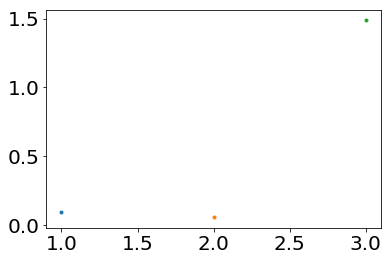

In [13]:
plt.figure()
plt.errorbar(1, np.median(O_[np.argmin(E_), ...][:, 0]), np.std(O_[np.argmin(E_), ...][:, 0]), fmt = '.')
plt.errorbar(2, np.median(O_[np.argmin(E_), ...][:, 1]), np.std(O_[np.argmin(E_), ...][:, 1]), fmt = '.')
plt.errorbar(3, np.median(O_[np.argmin(E_), ...][:, 2]), np.std(O_[np.argmin(E_), ...][:, 2]), fmt = '.')
plt.show()

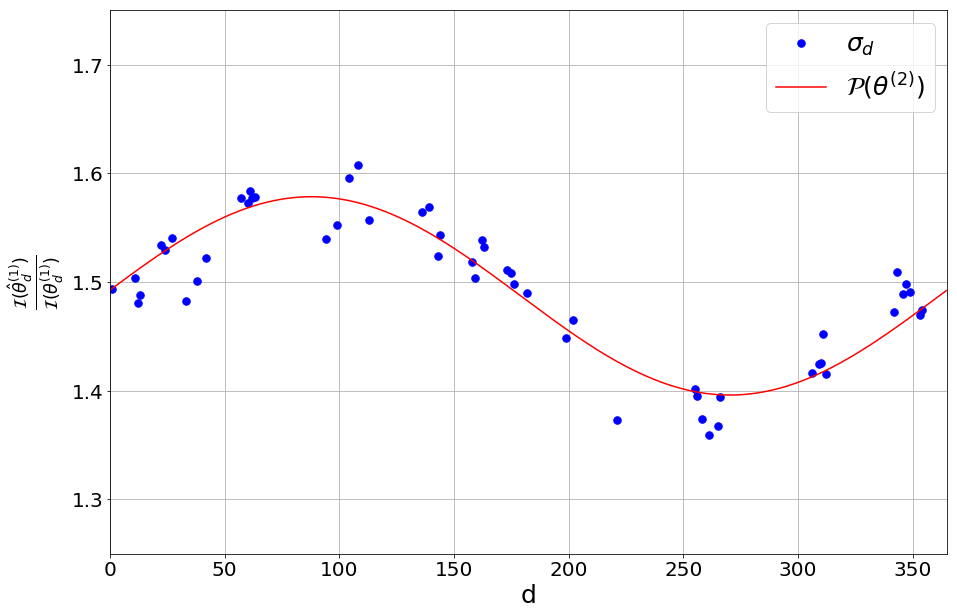

0.017679301699899896


In [14]:
def f(a, b, c, t, N = 365.):
    return a * np.sin(b + ( (2*np.pi) / N ) * t) + c


idx = np.squeeze((Z < 365) & (Z > 0.))
x   = np.linspace(-365, 2*365, 3*365)[:, np.newaxis]
Y_hat = f(O[0], O[1], O[2], x)

#plt.figure(figsize = (5, 2.5))

plt.rcParams.update({'font.size': 20})

plt.figure(figsize = (15, 10))
plt.plot(Z[idx, :], W[idx, 0], 'b.', markersize = 15, label = '$\sigma_d$')
plt.plot(x[np.squeeze((x < 365) & (x > 0.))  ], Y_hat[np.squeeze((x < 365) & (x > 0.))  ], 'r-', 
         label = r'$\mathcal{P} ( \theta^{(2)} )$')
plt.xlabel(r'd', fontsize = 25)
plt.ylabel(r'$\frac{\mathcal{I} ( \hat \theta_d^{(1)} )}{ \mathcal{I} ( \theta_d^{(1)} )}$', fontsize = 25)
plt.ylim(1.25, 1.75)
plt.xlim(0, 365)
plt.legend(prop = {'size': 25})
plt.grid()
plt.show()

e = np.mean(np.sqrt( ( np.squeeze(Y_hat[Z[idx]]) - np.squeeze(W[idx]) )**2 ))
print(e)

### This program validates the degrees of freedom on a polynomial which fits over the GHI attenuation

In [279]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_least_squares_fit(X, Y, n = 2):
    X = PolynomialFeatures(n).fit_transform(X)
    return np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))


def polynomial_least_squares_model(X, C, n = 2):
    X = PolynomialFeatures(n).fit_transform(X)
    return np.matmul(X, C)


idx = np.squeeze((Z < 365) & (Z > 0.))
x   = np.linspace(-365, 2*365, 3*365)[:, np.newaxis]

K = 10
P = 20
N = Z.shape[0]
idx_perm = np.random.permutation(N)
n = N//K

E_ = np.zeros((P-1))

for p in range(1, P):
    for k in range(K):
        idx_test = idx_perm[k*n:(k + 1)*n]
        idx_train = np.setxor1d(idx_perm, idx_perm[k*n:(k + 1)*n])

        x_train = X[idx_train, :]
        y_train = Y[idx_train, :]
        w_train = W[idx_train, :]
        z_train = Z[idx_train, :]
        x_test  = X[idx_test, :]
        y_test  = Y[idx_test, :]
        w_test  = W[idx_test, :]
        z_test  = Z[idx_test, :]
        x_test  = x[idx_test, :]

        C     = polynomial_least_squares_fit(z_train, w_train, p)
        Y_hat = polynomial_least_squares_model(x, C, p)
        E_[p - 1] += np.mean(np.sqrt( ( np.squeeze(Y_hat[z_test]) - np.squeeze(w_test) )**2 ))/K
        
    print(p, E_[p - 1])

1 0.04818050373211853
2 0.04785509564270259
3 0.04703953482347546
4 0.04664347134062899
5 0.04609124072884861
6 0.045908197496481035
7 0.03197192636265359
8 0.03133875370049165
9 0.01759384081293526
10 0.017474527348719748
11 0.017064980458942194
12 0.017100669184982684
13 0.016420748494501508
14 0.016387401930880712
15 0.017009515972100136
16 0.03020345760760704
17 0.4522494394006208
18 23.149878410091354
19 161.9689389205771


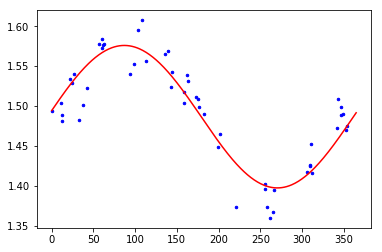

0.017764779460115773


In [282]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_least_squares_fit(X, Y, n = 2):
    X = PolynomialFeatures(n).fit_transform(X)
    return np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))


def polynomial_least_squares_model(X, C, n = 2):
    X = PolynomialFeatures(n).fit_transform(X)
    return np.matmul(X, C)


idx = np.squeeze((Z < 365) & (Z > 0.))
x   = np.linspace(-365, 2*365, 3*365)[:, np.newaxis]

C1    = polynomial_least_squares_fit(Z, W, n = 14)
Y_hat = polynomial_least_squares_model(x, C1, n = 14) 
    
plt.figure()
plt.plot(Z[idx, :], W[idx, 0], 'b.', markersize = 5)
plt.plot(x[np.squeeze((x < 365) & (x > 0.))  ], Y_hat[np.squeeze((x < 365) & (x > 0.))  ], 'r-')
plt.grid()
plt.show()

e = np.mean(np.sqrt( ( np.squeeze(Y_hat[Z[idx]]) - np.squeeze(W[idx]) )**2 ))
print(e)

### This program saves the stepwise shifting and attenuation model to later use in the feature extraction algorithm

In [15]:
def save_model(C, m1, m2, m3, m4, d1, d2, d3, path, name):
    
    with open(path.format(name), 'wb') as f:
        pickle.dump(C, f)
        pickle.dump([m1, m2, m3, m4, d1, d2, d3], f)
        
    print(C.shape, m1, m2, m3, m4, d1, d2, d3)   

save_model(OPT[1], m1, m2, m3, m4, d1, d2, d3, path = 'Q:{}', name = 'clear_sky_ghi_model.pkl')

(3,) -83.18181818181819 2929.5789473684213 -2737.285714285714 138.2 72 220 305


### Implementation of the shifting and attenuation model on the infrared feature extraction algorithm

(3,) 7
(array([-0.09051929,  3.19684082,  1.4879869 ]), [-83.18181818181819, 2929.5789473684213, -2737.285714285714, 138.2, 72, 220, 305])
1 2018 1.494540403083433 -83.18181818181819
32 2018 1.5395529112613138 -83.18181818181819
60 2018 1.568164075379351 -83.18181818181819
91 2018 1.5783887504416043 2929.5789473684213
121 2018 1.5643233432617316 2929.5789473684213
152 2018 1.5289645022542366 2929.5789473684213
182 2018 1.4837665136477636 2929.5789473684213
213 2018 1.4383588520223405 2929.5789473684213
244 2018 1.4067516569034968 -2737.285714285714
274 2018 1.3976280701288193 -2737.285714285714
305 2018 1.412931880562241 -2737.285714285714
335 2018 1.4477055098415024 138.2


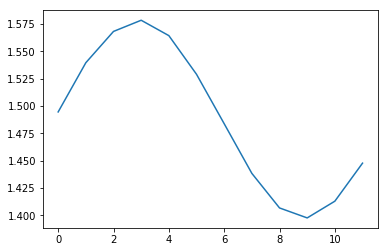

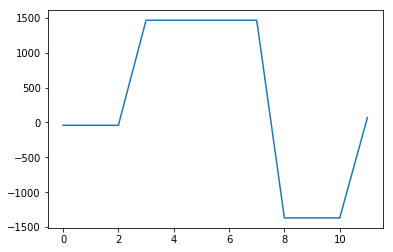

In [21]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime


def load_model(path, name):
    
    with open(path.format(name), 'rb') as f:
        C0 = pickle.Unpickler(f).load()
        C1 = pickle.Unpickler(f).load()

    print(C0.shape, len(C1))
    return C0, C1



def pyranometer_effects(t, C):
    
    def periodic_model(C, t, N = 365.):
        return C[0] * np.sin(C[1] + ( (2*np.pi) / N ) * t) + C[2]
    
    def picewise_model(C, x0, x1):
        
        if x1 < 2018:
            x0 -= 365
        
        if x0 <= C[4]:
            y1 = C[0]
    
        if x0 >  C[4]:
            y1 = C[1]
            
        if x0 >  C[5]:
            y1 = C[2]
            
        if x0 >  C[6]:
            y1 = C[3]
                       
        return y1

    x0 = t.timetuple().tm_yday
    x1 = t.timetuple().tm_year
    
    y0 = periodic_model(C[0], x0)
    y1 = picewise_model(C[1], x0, x1)
    print(x0, x1, y0, y1)
    return y0, int(y1/2)



C = load_model(path = 'Q:{}', name = 'clear_sky_ghi_model.pkl')
print(C)
X = np.empty((2,0))

for m in range(1, 13):
    x = datetime(2018, m, 1, 0, 0)
    x = pyranometer_effects(x, C)
    X = np.concatenate((X, np.array(x)[:, np.newaxis]), axis = 1)

plt.figure()
plt.plot(X[0])
plt.show()

plt.figure()
plt.plot(X[1])
plt.show()

# - Atmospheric scattering effect correction

### These programs load the data and prepared for an smooth fitting in which the end of a year overlaps with the beggining of another year.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


def load_data(path, name):
    file = path.format(name)

    with open(file, 'rb') as f:
        X = pickle.Unpickler(f).load()
        Y = pickle.Unpickler(f).load()
        Z = pickle.Unpickler(f).load()
        W = pickle.Unpickler(f).load()
        
    X = np.concatenate(X)
    Y = np.concatenate(Y)
    Z = np.concatenate(Z)
    W = np.concatenate(W)
    return X, Y, Z, W

X, Y, Z, W = load_data(path = 'Q:{}', name = 'clear_sky_background_effect_fit_v1.pkl')
print(X.shape, Y.shape, Z.shape, W.shape)

(4372, 2) (4372, 4) (4372, 1) (4372, 1)


In [2]:
w = np.empty((0,1))
for i in range(W.shape[0]):
    #print(W[i][0].timetuple().tm_yday)
    w = np.vstack((w, W[i][0].timetuple().tm_yday))
    
print(w.shape)

X = np.concatenate((X, w), axis = 1)
print(X.shape)

(4372, 1)
(4372, 3)


## Validation of the degrees of freedom necessary on the polynomal fitting for each information that have been extracted

In [3]:
from sklearn.preprocessing import PolynomialFeatures


def polynomial_least_squares_fit(X, Y, n = 2):
    X = PolynomialFeatures(n).fit_transform(X)
    return np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))


def polynomial_least_squares_model(X, C, n = 2):
    X = PolynomialFeatures(n).fit_transform(X)
    return np.matmul(X, C)


N = X.shape[0]
#n1 = 500
#n2 = 2500
#idx = np.arange(N)
#idx_train = idx[n1:n2]
#idx_test  = np.concatenate((idx[:n1], idx[n2:]), axis = 0)
#print(idx.shape, idx_train.shape, idx_test.shape)
n = int(N * .75)
idx = np.random.permutation(N)
idx_train = idx[:n]
idx_test  = idx[n:]

E = np.empty((0, 4))

for p in range(10):

    C0 = polynomial_least_squares_fit(X[idx_train, :], Y[idx_train, 0], n = p)
    C1 = polynomial_least_squares_fit(X[idx_train, :], Y[idx_train, 1], n = p)
    C2 = polynomial_least_squares_fit(X[idx_train, :], Y[idx_train, 2], n = p)
    C3 = polynomial_least_squares_fit(X[idx_train, :], Y[idx_train, 3], n = p)

    Y0 = polynomial_least_squares_model(X[idx_test, :], C0, n = p)
    Y1 = polynomial_least_squares_model(X[idx_test, :], C1, n = p)
    Y2 = polynomial_least_squares_model(X[idx_test, :], C2, n = p)
    Y3 = polynomial_least_squares_model(X[idx_test, :], C3, n = p)

    e = [np.mean(abs(Y[idx_test, 0] - Y0)), np.mean(abs(Y[idx_test, 1] - Y1)), \
         np.mean(abs(Y[idx_test, 2] - Y2)), np.mean(abs(Y[idx_test, 3] - Y3))]
    
    E = np.vstack((E, e))

print('P0: {} Error: {}'.format(np.argmin(E[:, 0]), E[np.argmin(E[:, 0]), 0]))
print('P1: {} Error: {}'.format(np.argmin(E[:, 1]), E[np.argmin(E[:, 1]), 1]))
print('P2: {} Error: {}'.format(np.argmin(E[:, 2]), E[np.argmin(E[:, 2]), 2]))
print('P3: {} Error: {}'.format(np.argmin(E[:, 3]), E[np.argmin(E[:, 3]), 3]))

P0: 5 Error: 255.80929989622345
P1: 4 Error: 595.6372391275772
P2: 5 Error: 16320.383061139793
P3: 5 Error: 0.0813088616277388


In [5]:
from sklearn.preprocessing import PolynomialFeatures


def polynomial_least_squares_fit(X, Y, n, l):
    X = PolynomialFeatures(n).fit_transform(X)
    A = np.matmul(X.T, X) + l*np.identity(X.shape[1])*X.shape[0]
    return np.matmul(np.linalg.inv(A), np.matmul(X.T, Y))


def polynomial_least_squares_model(X, W, n): return np.matmul(PolynomialFeatures(n).fit_transform(X), W)

K = 5
P = 9
S = 10

x_ = np.logspace(-12, 12, S)
p_ = np.arange(1, P)
E = np.zeros((len(p_), S, 4))
N = X.shape[0]
idx = np.random.permutation(N)
n = N//K

for p, i in zip(p_, range(len(p_))):
    for l, ii in zip(x_, range(S)):
        for k in range(K):
            
            idx_test = idx[k*n:(k + 1)*n]
            idx_train = np.setxor1d(idx, idx[k*n:(k + 1)*n])
            
            W     = polynomial_least_squares_fit(X[idx_train, :], Y[idx_train, :], n = p, l = l)
            Y_hat = polynomial_least_squares_model(X[idx_test, :], W, n = p)

            E[i, ii, 0] += np.sqrt(np.mean((Y_hat[:, 0] - Y[idx_test, 0])**2))/K
            E[i, ii, 1] += np.sqrt(np.mean((Y_hat[:, 1] - Y[idx_test, 1])**2))/K
            E[i, ii, 2] += np.sqrt(np.mean((Y_hat[:, 2] - Y[idx_test, 2])**2))/K
            E[i, ii, 3] += np.sqrt(np.mean((Y_hat[:, 3] - Y[idx_test, 3])**2))/K
        
print(E.shape)

(8, 10, 4)


In [25]:
import shelve

path = r'Q:'
name = r'workflow_polynomial_atmospheric_model.pkl'
name = r'{}\{}'.format(path, name)
    
shelve_ = shelve.open(name, 'n')
for key in dir():
    try: shelve_[key] = globals()[key]
    except: print('ERROR shelving: {0}'.format(key))
shelve_.close()

ERROR shelving: __builtin__
ERROR shelving: __builtins__
ERROR shelving: exit
ERROR shelving: get_ipython
ERROR shelving: np
ERROR shelving: pickle
ERROR shelving: plt
ERROR shelving: quit
ERROR shelving: shelve


In [18]:
import pickle, shelve
import numpy as np
import matplotlib.pyplot as plt
    
path = r'Q:'
name = r'workflow_polynomial_atmospheric_model.pkl'
name = r'{}\{}'.format(path, name)

shelve_ = shelve.open(name)
for key in shelve_: 
    try: globals()[key] = shelve_[key]
    except: print('ERROR loading: {0}'.format(key))
shelve_.close()

1 278 10120.691527264094 4.771760948938741e-06
2 239 9160.329704771384 5.517492376129129e-07
3 237 8693.911931129973 4.939621743878316e-07
4 180 8568.120273328539 2.1102034285685966e-08
5 30 8468.567521325594 5.256791122018419e-12
6 297 8426.265240314506 1.3650078065460137e-05
7 818 8432.135587219682 44838559.48021182
8 994 8775.931489204455 758367791499.7191


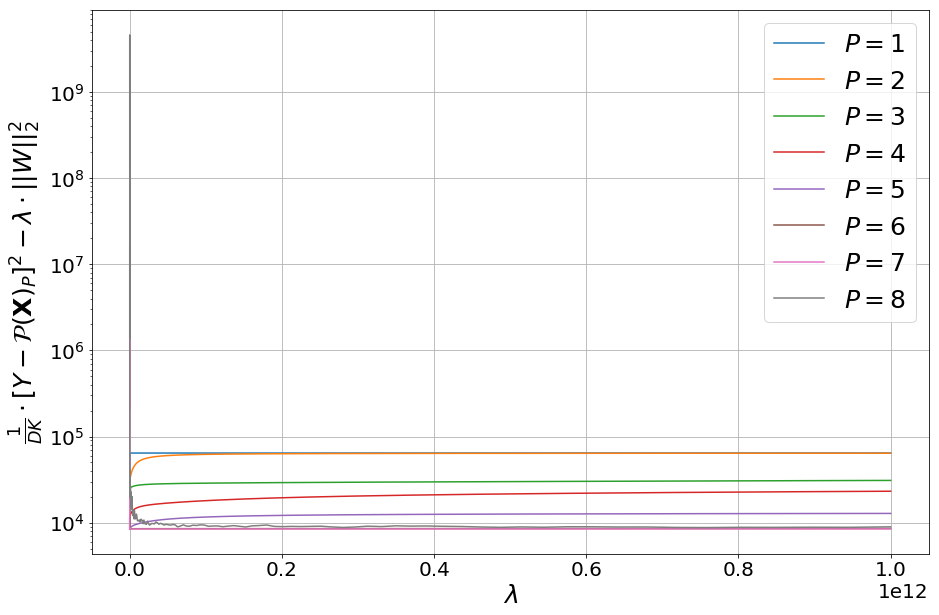

(1000,) (8, 1000)


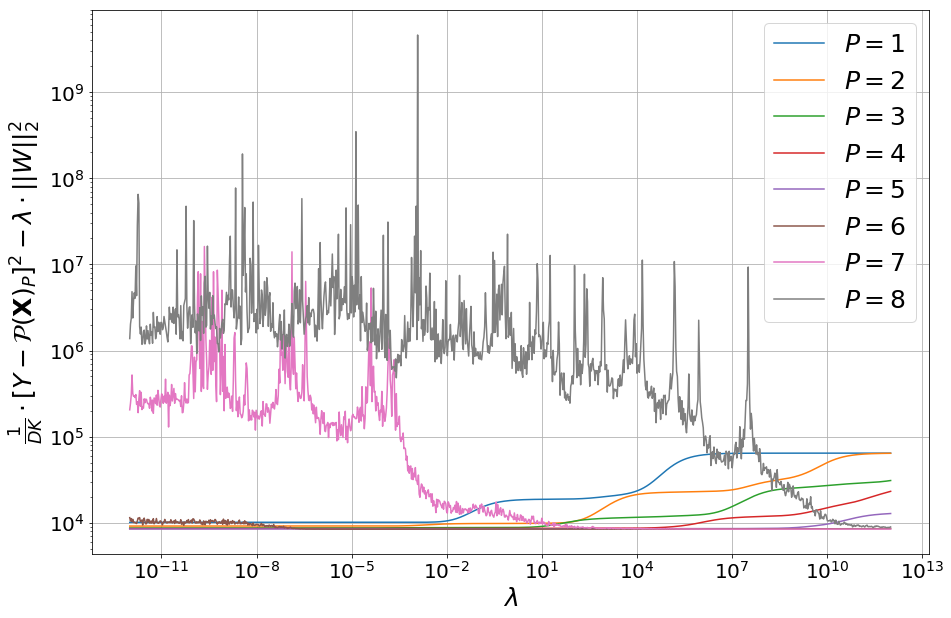

In [19]:
e_ = np.sum(E, axis = 2)
x_ = np.logspace(-12, 12, S)
p_ = np.arange(1, P)

for i in range(len(p_)):
    print(i + 1, np.argmin(e_[i, :]), e_[i, np.argmin(e_[i, :])], x_[np.argmin(e_[i, :])])

plt.rcParams.update({'font.size': 20})

plt.figure(figsize = (15, 10))
plt.plot(x_, e_[0, :], '-', label = r'$P = 1$')
plt.plot(x_, e_[1, :], '-', label = r'$P = 2$')
plt.plot(x_, e_[2, :], '-', label = r'$P = 3$')
plt.plot(x_, e_[3, :], '-', label = r'$P = 4$')
plt.plot(x_, e_[4, :], '-', label = r'$P = 5$')
plt.plot(x_, e_[5, :], '-', label = r'$P = 6$')
plt.plot(x_, e_[6, :], '-', label = r'$P = 7$')
plt.plot(x_, e_[7, :], '-', label = r'$P = 8$')
plt.ylabel(r'$ \frac{1}{DK} \cdot [ Y - \mathcal{P} ( \mathbf{X} )_P]^2 - \lambda \cdot || W ||^2_2 $', fontsize = 25)
plt.xlabel(r'$\lambda$', fontsize = 25)
plt.yscale('log')
#plt.xscale('log')
plt.legend(loc = 'upper right', prop = {'size': 25})
plt.grid()
plt.show()
print(x_.shape, e_.shape)

plt.rcParams.update({'font.size': 20})

plt.figure(figsize = (15, 10))
plt.plot(x_, e_[0, :], '-', label = r'$P = 1$')
plt.plot(x_, e_[1, :], '-', label = r'$P = 2$')
plt.plot(x_, e_[2, :], '-', label = r'$P = 3$')
plt.plot(x_, e_[3, :], '-', label = r'$P = 4$')
plt.plot(x_, e_[4, :], '-', label = r'$P = 5$')
plt.plot(x_, e_[5, :], '-', label = r'$P = 6$')
plt.plot(x_, e_[6, :], '-', label = r'$P = 7$')
plt.plot(x_, e_[7, :], '-', label = r'$P = 8$')
plt.ylabel(r'$ \frac{1}{DK} \cdot [ Y - \mathcal{P} ( \mathbf{X} )_P]^2 - \lambda \cdot || W ||^2_2 $', fontsize = 25)
plt.xlabel(r'$\lambda$', fontsize = 25)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc = 'upper right', prop = {'size': 25})
plt.grid()
plt.show()

### Single regressor model for different optimal degrees of freedom

In [6]:
C0 = polynomial_least_squares_fit(X, Y[:, 0], n = 5)
C1 = polynomial_least_squares_fit(X, Y[:, 1], n = 5)
C2 = polynomial_least_squares_fit(X, Y[:, 2], n = 5)
C3 = polynomial_least_squares_fit(X, Y[:, 3], n = 5)

Y0 = polynomial_least_squares_model(X, C0, n = 5)
Y1 = polynomial_least_squares_model(X, C1, n = 5)
Y2 = polynomial_least_squares_model(X, C2, n = 5)
Y3 = polynomial_least_squares_model(X, C3, n = 5)

plt.rcParams.update({'font.size': 20})

plt.figure(figsize = (20, 5))
plt.subplot(1, 4, 1)
plt.plot(Y[:, 0], 'b.', markersize = 1, label = '$\theta^{(3)}_{1,k}$')
plt.plot(Y0, 'r--', linewidth = 1., label = 'P = 6')
plt.xlabel('k')
plt.ylabel('$\theta^{(3)}_1$')

plt.subplot(1, 4, 2)
plt.plot(Y[:, 1], 'b.', markersize = 1, label = 'P = 6')
plt.plot(Y1, 'r--', linewidth = 1., label = '$\theta^{(3)}_{2,k}$')
plt.xlabel('k')
plt.ylabel('$\theta^{(3)}_2$')

plt.subplot(1, 4, 3)
plt.plot(Y[:, 2], 'b.', markersize = 1, label = '$\theta^{(3)}_{1,k}$')
plt.plot(Y2, 'r--', linewidth = 1., label = 'P = 6')
plt.xlabel('k')
plt.ylabel('$\theta^{(3)}_3$')

plt.subplot(1, 4, 4)
plt.plot(Y[:, 3], 'b.', markersize = 1, label = '$\theta^{(3)}_{4,k}$')
plt.plot(Y3, 'r--', linewidth = 1., label = 'P = 6')
plt.xlabel('k')
plt.ylabel('$\theta^{(3)}_4$')

plt.show()

TypeError: polynomial_least_squares_fit() missing 1 required positional argument: 'l'

### Multi-output regressor model that has the same number of optimal degrees of freedom in each output 

8475.73626624243


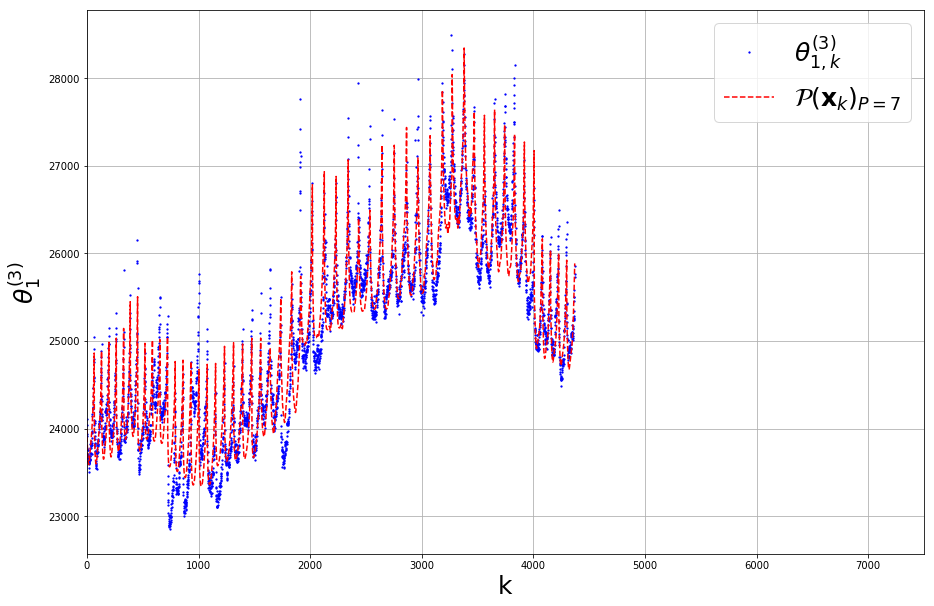

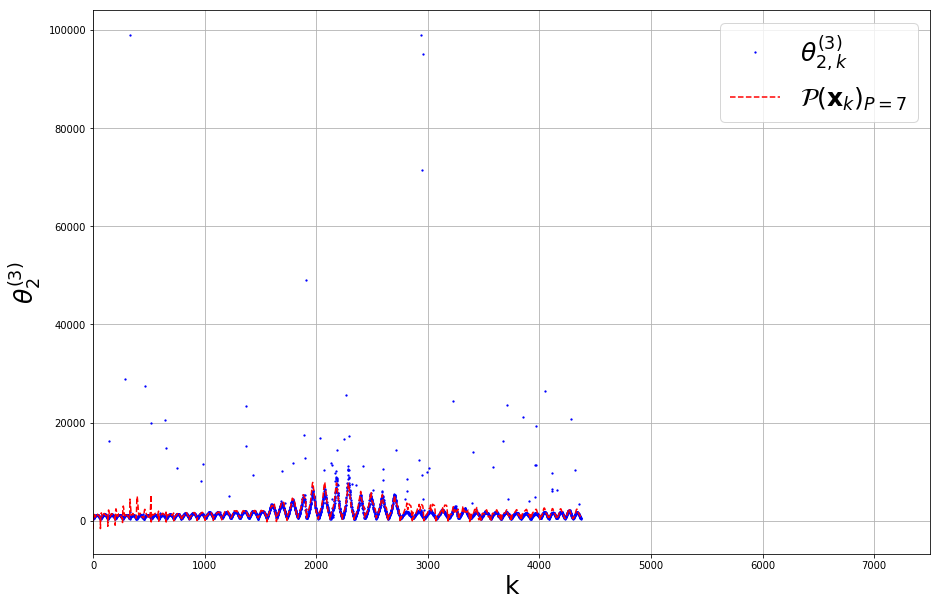

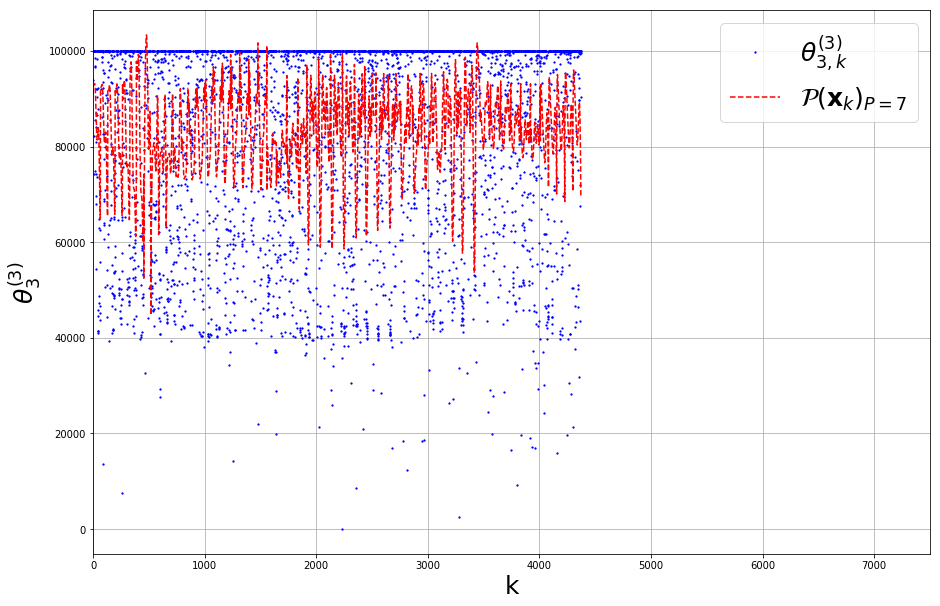

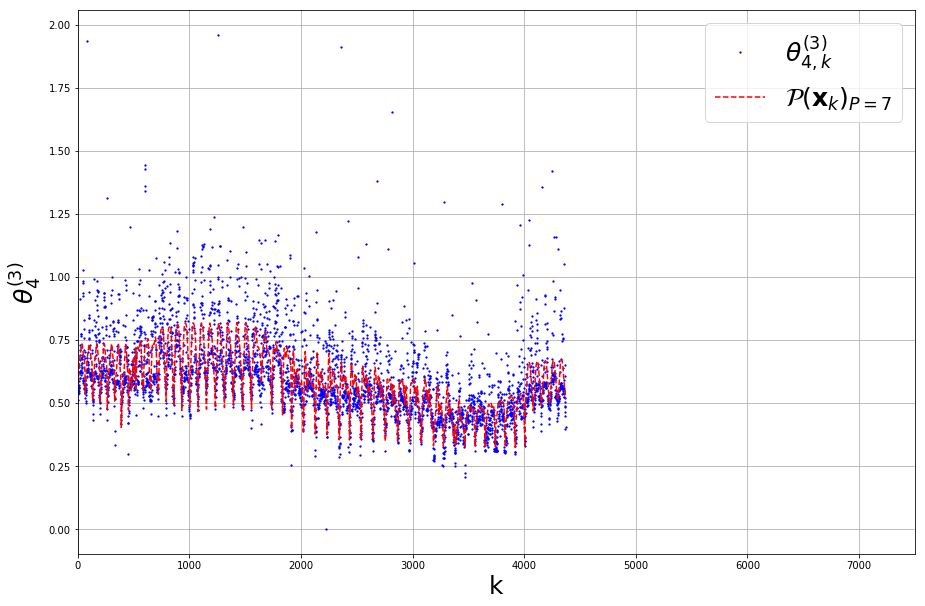

In [7]:
C     = polynomial_least_squares_fit(X, Y, n = 7, l = 1e7)
#C     = polynomial_least_squares_fit(X, Y, n = 5, l = 0)
Y_hat = polynomial_least_squares_model(X, C, n = 7)
e_test = np.sqrt(abs(Y_hat - Y).sum())
print(e_test)

#plt.figure(figsize = (15, 2.5))
#plt.subplot(141)
plt.figure(figsize = (15, 10))
plt.plot(Y[:, 0], 'b.', markersize = 2.5, label = r'$\theta^{(3)}_{1,k}$')
plt.plot(Y_hat[:, 0], 'r--', linewidth = 1.5, label = r'$\mathcal{P}(\mathbf{x}_k)_{P = 7}$')
plt.xlabel(r'k', fontsize = 25)
plt.ylabel(r'$\theta^{(3)}_1$', fontsize = 25)
plt.xlim(0, 7500)
plt.legend(prop = {'size': 25})
plt.grid()
plt.show()

#plt.subplot(142)
plt.figure(figsize = (15, 10))
plt.plot(Y[:, 1], 'b.', markersize = 2.5, label = r'$\theta^{(3)}_{2,k}$')
plt.plot(Y_hat[:, 1], 'r--', linewidth = 1.5, label = r'$\mathcal{P}(\mathbf{x}_k)_{P = 7}$')
plt.xlabel(r'k', fontsize = 25)
plt.ylabel(r'$\theta^{(3)}_2$', fontsize = 25)
plt.xlim(0, 7500)
plt.legend(prop = {'size': 25})
plt.grid()
plt.show()

#plt.subplot(143)
plt.figure(figsize = (15, 10))
plt.plot(Y[:, 2], 'b.', markersize = 2.5, label = r'$\theta^{(3)}_{3,k}$')
plt.plot(Y_hat[:, 2], 'r--', linewidth = 1.5, label = r'$\mathcal{P}(\mathbf{x}_k)_{P = 7}$')
plt.xlabel('k', fontsize = 25)
plt.ylabel(r'$\theta^{(3)}_3$', fontsize = 25)
plt.xlim(0, 7500)
plt.legend(prop = {'size': 25})
plt.grid()
plt.show()

#plt.subplot(144)
plt.figure(figsize = (15, 10))
plt.plot(Y[:, 3], 'b.', markersize = 2.5, label = r'$\theta^{(3)}_{4,k}$')
plt.plot(Y_hat[:, 3], 'r--', linewidth = 1.5, label = r'$\mathcal{P}(\mathbf{x}_k)_{P = 7}$')
plt.xlabel('k', fontsize = 25)
plt.ylabel(r'$\theta^{(3)}_4$', fontsize = 25)
plt.xlim(0, 7500)
plt.legend(prop = {'size': 25})
plt.grid()
plt.show()

In [ ]:
def save_model(C, path, name = 'clear_sky_background_model.pkl'):
    
    with open(path.format(name), 'wb') as f:
        pickle.dump(C, f)
        
    print(C.shape)   

save_model(C, path = 'Q:{}')

### Program that saves each the coeffcients of each model fitted

In [4]:
def save_model(C0, C1, C2, C3, path, name = 'clear_sky_model.pkl'):
    
    with open(path.format(name), 'wb') as f:
        pickle.dump(C0, f); pickle.dump(C1, f); pickle.dump(C2, f); pickle.dump(C3, f)
        
    print(C0.shape, C1.shape,C2.shape, C3.shape)   

m = [40, 30]
N = [60, 80]
A = X[100, :]

save_model(C0, C1, C2, C3, path = 'Q:{}')

(220,) (220,) (220,) (220,)


### Implementation of the functions for infrared feature extraction program, and testing of them.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pickle


def F(x0, x1, x2, x3):
    f = x0 * np.exp( (X[:, 1] - m[1]) / x1)[:, np.newaxis]
    f+= x2 * ( (x3**2) /( (X[:, 0] - m[0])**2 + (X[:, 1] - m[1])**2 + x3**2 )**1.5 )[:, np.newaxis]
    f[f > 45057.] = 45057.
    return f


def load_model(path, name = 'clear_sky_model.pkl'):
    
    with open(path.format(name), 'rb') as f:
        C0 = pickle.Unpickler(f).load(); C1 = pickle.Unpickler(f).load()
        C2 = pickle.Unpickler(f).load(); C3 = pickle.Unpickler(f).load()
    
    print(C0.shape, C1.shape,C2.shape, C3.shape)
    return C0, C1, C2, C3


def atmospheric_effect(X, C):
    
    def polynomial_least_squares_model(X, C, n):
        X = PolynomialFeatures(n).fit_transform(X[:, np.newaxis].T)
        print(X.shape, C.shape)
        return np.matmul(X, C)

    x0 = polynomial_least_squares_model(X, C[0], n = 5)
    x1 = polynomial_least_squares_model(X, C[1], n = 5)
    x2 = polynomial_least_squares_model(X, C[2], n = 5)
    x3 = polynomial_least_squares_model(X, C[3], n = 5)
    print(x0, x1, x2, x3)
    return F(x0, x1, x2, x3)


N = [60, 80]
#A = X[100, :]

XX, YY = np.meshgrid(np.linspace(0, N[1] - 1, N[1]), np.linspace(0, N[0] - 1, N[0]))
X      = np.concatenate([XX.flatten()[:, np.newaxis], YY.flatten()[:, np.newaxis]], axis = 1)

C = load_model(path = 'Q:{}')
print(len(C), A.shape, A)

B = atmospheric_effect(A, C)

print(B.shape)
plt.figure()
plt.imshow(B.reshape(N))
plt.colorbar()
plt.show()

(220,) (220,) (220,) (220,)
4 (2,) [20.  1.]
(1, 21) (220,)


ValueError: shapes (1,21) and (220,) not aligned: 21 (dim 1) != 220 (dim 0)